In [1]:
import os
import sys
# TODO: Fix sibling directory imports
cwd = os.path.dirname(os.getcwd())
sys.path.append(os.path.join(cwd, '..'))

from src.datautils.sandia import SandiaDataProvider
import matplotlib.pyplot as plt
%matplotlib inline

num_epochs = 1
batch_size = 6

Create a data provider

In [2]:
train_data = SandiaDataProvider(which_set='train', dataset_home='../../datasets/sandia/', img_size=28)

Get an iterator object

In [3]:
batch_iterator = train_data.get_batch_iterator(batch_size=batch_size)

On which you can call `next()`

In [4]:
inputs, targets = next(batch_iterator)
print([x.shape for x in [inputs, targets]])
print(targets)

[(6, 28, 28, 16), (6,)]
[4 7 7 5 8 3]


The first dimension is the batch size

In [5]:
first_input = inputs[0]

The second and third are the image size, the last one is the channels - 8 for the question images and 8 for the answers

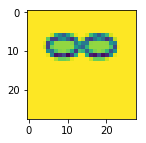

In [6]:
first_input_question_imgs = first_input[:, :, :8]
plt.figure(figsize=(2,2))
plt.imshow(first_input_question_imgs[:, :, 0]);

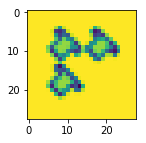

In [7]:
first_input_answer_imgs = first_input[:, :, 8:]
plt.figure(figsize=(2,2))
plt.imshow(first_input_answer_imgs[:, :, 0]);

Or iterate over

In [8]:
num_batches = 0
for batch in batch_iterator:
    # Do something here
    num_batches += 1
print(num_batches)

125


A training loop would look like this:

In [9]:
for epoch in range(num_epochs):
    # Get a generator object at the start of each epoch
    batch_iterator = train_data.get_batch_iterator(batch_size=batch_size)
    
    # And loop over batches
    for batch in batch_iterator:
        # Do whatever you want to do with the data here
                pass

## Targets

Calling `get_batch_iterator()` with the `type_targets` flag set to true, will return a generator that yields the 8 question images as inputs and integers in [0;3] as targets - those correspond to the type of question - 0, 1, 2, 3 are 1_layer, 2_layer, 3_layer and logical, respectively

In [13]:
type_it = train_data.get_batch_iterator(10, type_targets=True)

inp, tar = next(type_it)
print(inp.shape)
print(tar)

(10, 28, 28, 8)
[2 0 2 2 2 2 1 2 2 1]


## Only images

In [16]:
img_it = train_data.get_image_batch_iterator(10)
inp, tar = next(img_it)
print(inp.shape)
print(tar)

torch.Size([10, 1, 28, 28])
None
